<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [4]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 39.1MB/s]


In [5]:
!unzip '/content/red-wine-quality-cortez-et-al-2009.zip' && rm '/content/red-wine-quality-cortez-et-al-2009.zip'

Archive:  /content/red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.shape

(1599, 12)

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
np.round(data.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


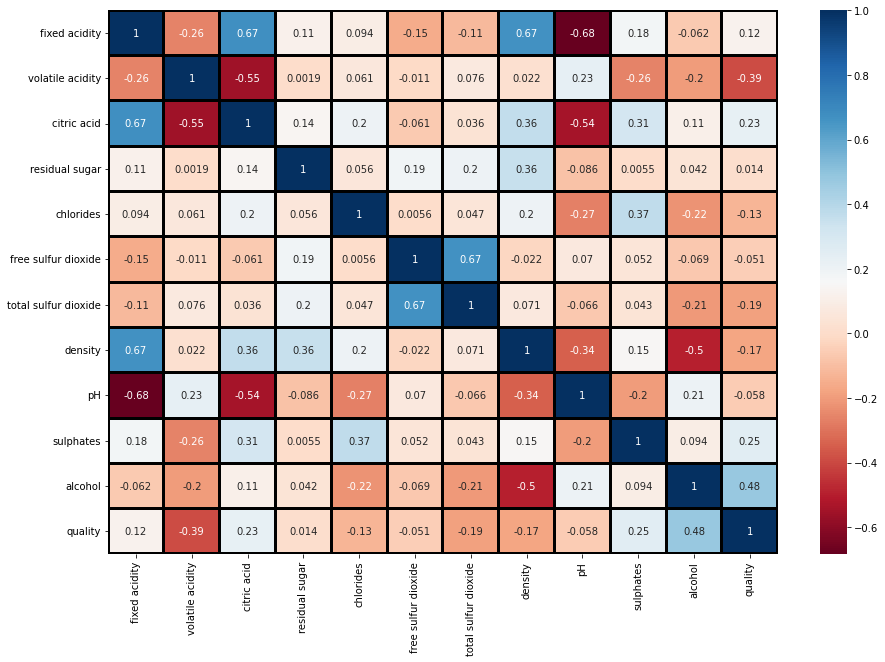

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), linecolor='black', linewidths=2, cmap='RdBu', annot=True)

# **MACHINE LEARNING MODELS**

In [87]:
x = np.array(data[['fixed acidity', 'citric acid', 'residual sugar',
                   'sulphates', 'alcohol']])
y = np.array(data['quality'])

In [26]:
px.scatter(data,x=data['alcohol'],y=y,trendline='ols')

In [88]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_test,y_train = train_test_split(x,y,
                                                 test_size = 0.5,
                                                 random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression

# feautures 'fixed acidity'(4.6-15.9), 'citric acid'(0-1), 'residual sugar'(0.9-15.5),'sulphates(0.33-2.0)', 'alcohol(8.4-14.9)'
features = np.array([[4.6,0,0.9,0.33,8.4]])

reg =LinearRegression()
reg.fit(x_train,y_train)
lr = reg.predict(features)
lr

ValueError: ignored

In [74]:
from sklearn.ensemble import RandomForestRegressor
# feautures 'fixed acidity'(4.6-15.9), 'citric acid'(0-1), 'residual sugar'(0.9-15.5),'sulphates(0.33-2.0)', 'alcohol(8.4-14.9)'
features = np.array([[4.6,0,0.9,0.33,8.4]])

reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)
rf = reg_rf.predict(features)
rf

ValueError: ignored

In [71]:
x_train.size

4795

In [72]:
y_train.size

640